In [1]:
import scipy.io as sio
import mat4py as m4p
import mne
import matplotlib.pyplot as plt
import numpy as np

In [2]:
raw = sio.loadmat('Data\d50c81cfullClean.mat')

In [3]:
sio.whosmat('Data\d50c81cfullClean.mat')

[('data_iccleanedAreref', (1, 1), 'struct'),
 ('data_iccleanedBreref', (1, 1), 'struct')]

In [17]:
raw_A00 = raw['data_iccleanedAreref'][0, 0]
data_A0 = raw_A00[0][0, 0]  #sampling freq
data_A1 = raw_A00[1][0, 1]  #total number of sample
data_A2 = raw_A00[2][0, 0]  #data
data_A3 = raw_A00[3][0, 0]  #time
data_A4 = raw_A00[4]        #channel name

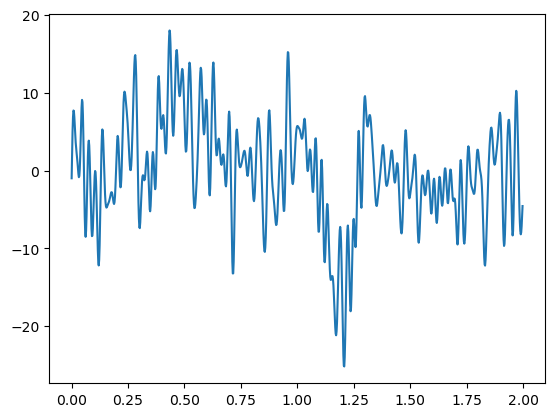

In [22]:
plt.plot(data_A3[0, 0:1000], data_A2[0, 0:1000])
plt.show()

In [12]:
raw_B00 = raw['data_iccleanedBreref'][0, 0]
data_B2 = raw_B00[2][0, 0]
data_B3 = raw_B00[3][0, 0] #time
data_B4 = raw_B00[4]


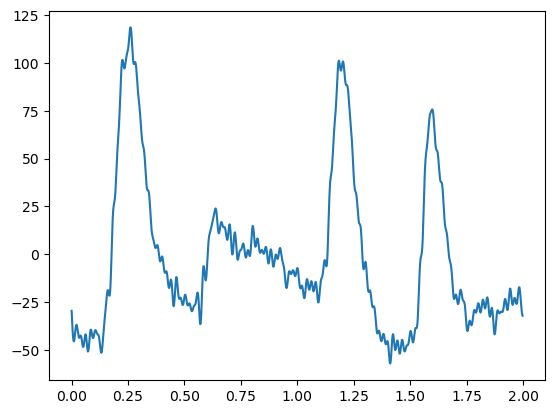

In [23]:
plt.plot(data_A3[0, 0:1000], data_B2[0, 0:1000])
plt.show()

In [19]:
# del data_A